In [ ]:
#About The Project
#Breast cancer is primarily divied into five molecular sub-types using PAM50. 
#The subtypes are Luminal A, Luminal B, HER2, Basal like and Normal. This project aims to classify breast cancer subtypes using a proteomic dataset and machine learning algorithms.(KMeans and Linear Regression). These algorithms are unsupervised learning and supervised learning respectively. 
#The original classification was based on the PAM5O geness based on the final mRNA prduct. This project used proteomic data which has protein as the final product.
#The aim of the project is to determine the accuracyand efficacy of machine learning algorithms in classifying breast cancer subtypes by comparing the results of the classification provided by each algorithm with the general PAM50 subtype classification.

In [ ]:
# Datasets Summary
# The first dataset , 77_cancer_proteomes_CPTAC_itraq.csv contains published iTRAQ proteome profiling of 77 breast cancer samples generated by the Clinical Proteomic Tumor Analysis Consortium (NCI/NIH). It contains expression values for ~12.000 proteins for each sample, with missing values present when a given protein could not be quantified in a given sample.
# The second dataset , clinical_data_breast_cancer.csv contains clinical data of 105 patients , analyzed, sampled, contained features like gender, age and included the type of cancer classification.
# The third dataset, PAM50_proteins.csv contains the list of genes and proteins used by the PAM50 classification system. The column RefSeqProteinID contains the protein IDs that can be matched with the IDs in the main protein expression data set.

In [84]:
# Import Packages

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sgt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [89]:

import sgt
sgt.__version__
from sgt import SGT
print(sgt.__version__)


2.0.3


In [29]:
# Load data
df = pd.read_csv("C:/Users/kenny/Downloads/Documents/REU-DataScienceProgram/REU-Project/REU-FinalProject/CancerProteomes.csv")
df1 = pd.read_csv("C:/Users/kenny/Downloads/Documents/REU-DataScienceProgram/REU-Project/REU-FinalProject/PAM50 Proteins.csv")
df2 = pd.read_csv("C:/Users/kenny/Downloads/Documents/REU-DataScienceProgram/REU-Project/REU-FinalProject/ClinicalDataBreastCancer.csv")


In [58]:
#Extract the required proteomic data from df by merging its RefSeq_accession_number with the RefSeqProteinID from df1 
#The result limits the data from the 12553 genes in df to the PAM50 genes, which are the panel of genes for the classification of breast cancer subtypes

#Find the Index Ref_Seq from df match with Ref_Seq of df1 and merge them together
df3 = df.merge(df1, left_on='RefSeq_accession_number', right_on='RefSeqProteinID')[[ 'RefSeqProteinID', 'AO-A12D.01TCGA', 'C8-A131.01TCGA', 'AO-A12B.01TCGA', 'BH-A18Q.02TCGA', 'C8-A130.02TCGA', 'C8-A138.03TCGA', 'E2-A154.03TCGA', 'C8-A12L.04TCGA', 'A2-A0EX.04TCGA', 'AO-A12D.05TCGA', 'AN-A04A.05TCGA', 'BH-A0AV.05TCGA','C8-A12T.06TCGA', 'A8-A06Z.07TCGA', 'A2-A0CM.07TCGA', 'BH-A18U.08TCGA', 'A2-A0EQ.08TCGA', 'AR-A0U4.09TCGA', 'AO-A0J9.10TCGA', 'AR-A1AP.11TCGA','AN-A0FK.11TCGA', 'AO-A0J6.11TCGA','A7-A13F.12TCGA', 'BH-A0E1.12TCGA', 'A7-A0CE.13TCGA', 'A2-A0YC.13TCGA', 'AO-A0JC.14TCGA', 'A8-A08Z.14TCGA', 'AR-A0TX.14TCGA', 'A8-A076.15TCGA', 'AO-A126.15TCGA', 'BH-A0C1.16TCGA', 'A2-A0EY.16TCGA', 'AR-A1AW.17TCGA', 'AR-A1AV.17TCGA', 'C8-A135.17TCGA', 'A2-A0EV.18TCGA', 'AN-A0AM.18TCGA', 'D8-A142.18TCGA', 'AN-A0FL.19TCGA', 'BH-A0DG.19TCGA', 'AR-A0TV.20TCGA', 'C8-A12Z.20TCGA', 'AO-A0JJ.20TCGA', 'AO-A0JE.21TCGA', 'AN-A0AJ.21TCGA', 'A7-A0CJ.22TCGA', 'AO-A12F.22TCGA', 'A8-A079.23TCGA', 'A2-A0T3.24TCGA', 'A2-A0YD.24TCGA', 'AR-A0TR.25TCGA','AO-A03O.25TCGA', 'AO-A12E.26TCGA', 'A8-A06N.26TCGA', 'A2-A0YG.27TCGA', 'BH-A18N.27TCGA', 'AN-A0AL.28TCGA', 'A2-A0T6.29TCGA', 'E2-A158.29TCGA', 'E2-A15A.29TCGA', 'AO-A0JM.30TCGA', 'C8-A12V.30TCGA', 'A2-A0D2.31TCGA', 'C8-A12U.31TCGA', 'AR-A1AS.31TCGA', 'A8-A09G.32TCGA','C8-A131.32TCGA', 'C8-A134.32TCGA', 'A2-A0YF.33TCGA', 'BH-A0DD.33TCGA', 'BH-A0E9.33TCGA', 'AR-A0TT.34TCGA', 'AO-A12B.34TCGA', 'A2-A0SW.35TCGA', 'AO-A0JL.35TCGA', 'BH-A0BV.35TCGA', 'A2-A0YM.36TCGA', 'BH-A0C7.36TCGA', 'A2-A0SX.36TCGA','263d3f-I.CPTAC', 'blcdb9-I.CPTAC', 'c4155b-C.CPTAC' ]]
df.merge(df1, left_on='RefSeq_accession_number', right_on='RefSeqProteinID')[[ 'RefSeqProteinID', 'AO-A12D.01TCGA', 'C8-A131.01TCGA', 'AO-A12B.01TCGA', 'BH-A18Q.02TCGA', 'C8-A130.02TCGA', 'C8-A138.03TCGA', 'E2-A154.03TCGA', 'C8-A12L.04TCGA', 'A2-A0EX.04TCGA', 'AO-A12D.05TCGA', 'AN-A04A.05TCGA', 'BH-A0AV.05TCGA','C8-A12T.06TCGA', 'A8-A06Z.07TCGA', 'A2-A0CM.07TCGA', 'BH-A18U.08TCGA', 'A2-A0EQ.08TCGA', 'AR-A0U4.09TCGA', 'AO-A0J9.10TCGA', 'AR-A1AP.11TCGA','AN-A0FK.11TCGA', 'AO-A0J6.11TCGA','A7-A13F.12TCGA', 'BH-A0E1.12TCGA', 'A7-A0CE.13TCGA', 'A2-A0YC.13TCGA', 'AO-A0JC.14TCGA', 'A8-A08Z.14TCGA', 'AR-A0TX.14TCGA', 'A8-A076.15TCGA', 'AO-A126.15TCGA', 'BH-A0C1.16TCGA', 'A2-A0EY.16TCGA', 'AR-A1AW.17TCGA', 'AR-A1AV.17TCGA', 'C8-A135.17TCGA', 'A2-A0EV.18TCGA', 'AN-A0AM.18TCGA', 'D8-A142.18TCGA', 'AN-A0FL.19TCGA', 'BH-A0DG.19TCGA', 'AR-A0TV.20TCGA', 'C8-A12Z.20TCGA', 'AO-A0JJ.20TCGA', 'AO-A0JE.21TCGA', 'AN-A0AJ.21TCGA', 'A7-A0CJ.22TCGA', 'AO-A12F.22TCGA', 'A8-A079.23TCGA', 'A2-A0T3.24TCGA', 'A2-A0YD.24TCGA', 'AR-A0TR.25TCGA','AO-A03O.25TCGA', 'AO-A12E.26TCGA', 'A8-A06N.26TCGA', 'A2-A0YG.27TCGA', 'BH-A18N.27TCGA', 'AN-A0AL.28TCGA', 'A2-A0T6.29TCGA', 'E2-A158.29TCGA', 'E2-A15A.29TCGA', 'AO-A0JM.30TCGA', 'C8-A12V.30TCGA', 'A2-A0D2.31TCGA', 'C8-A12U.31TCGA', 'AR-A1AS.31TCGA', 'A8-A09G.32TCGA','C8-A131.32TCGA', 'C8-A134.32TCGA', 'A2-A0YF.33TCGA', 'BH-A0DD.33TCGA', 'BH-A0E9.33TCGA', 'AR-A0TT.34TCGA', 'AO-A12B.34TCGA', 'A2-A0SW.35TCGA', 'AO-A0JL.35TCGA', 'BH-A0BV.35TCGA', 'A2-A0YM.36TCGA', 'BH-A0C7.36TCGA', 'A2-A0SX.36TCGA','263d3f-I.CPTAC', 'blcdb9-I.CPTAC', 'c4155b-C.CPTAC' ]]


,RefSeqProteinID,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_057427,0.490373,0.764109,-1.108807,-0.179342,0.106156,-0.409316,-2.742664,0.179349,-2.506723,...,-1.651943,0.293752,1.359573,-1.358787,0.000077,0.944990,1.457488,-0.905015,-1.778314,0.236681
1,NP_002408,-0.625898,1.743696,-1.507899,-1.463969,1.883845,0.739026,-3.307172,-0.692468,-2.953194,...,-3.573312,0.039676,-1.177327,-3.278318,-1.320640,-0.918145,1.385987,-3.401099,-1.692017,-2.300132
2,NP_000415,-3.056549,0.658864,-4.121399,2.182497,-2.639094,0.943825,-5.903908,1.607704,-0.803378,...,-5.760191,-5.945578,-6.194613,-2.701464,0.291277,-1.125656,5.625404,2.897253,-0.323888,-0.287098
3,NP_000413,-3.113696,2.496602,-3.916310,2.319658,-1.976560,1.415596,-5.218972,-0.072875,-2.315378,...,-5.337661,-3.610654,-3.648293,-0.430516,-0.534171,-0.244293,3.271828,2.299599,-0.592251,0.283587
4,NP_000517,-2.629851,1.172945,-4.528806,2.399947,-1.579696,1.806910,-4.650701,2.523387,-0.098028,...,-4.632492,-1.899662,-2.263673,0.235850,-0.781806,-0.474116,2.166540,2.405068,-0.614352,-0.009573
5,NP_004439,9.668177,0.197406,-1.491270,-5.187379,-2.960521,-0.504402,-3.894260,0.039529,-1.643795,...,-4.404098,-4.308558,-1.770736,-3.623104,-3.322351,-2.779049,-4.891209,-1.951586,-0.817467,-0.578304
6,NP_005219,0.402748,1.245807,-2.386456,-1.922286,-2.422622,-2.625542,-3.284592,1.445952,-1.212331,...,-4.855177,-3.372659,-1.959120,-3.997727,-0.373667,-2.540300,-1.774955,0.333562,-0.794314,1.147433
7,NP_058519,-3.026070,-5.372478,2.025730,-7.703106,1.152435,-5.284283,2.861017,-4.116683,4.186597,...,2.073744,-2.099063,-2.690676,-1.521234,-3.060959,1.812966,-4.414536,-1.021301,-1.255268,-1.684496
8,NP_058518,-2.938445,-5.522250,2.017416,-8.218295,1.149155,-4.907597,3.098110,-4.711602,3.976493,...,2.096584,-1.976850,-2.618462,-1.524549,-3.060959,1.812966,-4.414536,-1.086205,-1.734113,-1.975701
9,NP_001116539,-3.094647,-5.461532,2.050673,-8.188186,1.158994,-5.309883,2.981445,-4.689670,3.942726,...,2.433466,-1.565183,-2.831964,-1.507973,-2.939435,3.227610,-3.776985,-1.032118,-1.811991,-1.954203


In [59]:
df3['RefSeqProteinID'].map(str)


0        NP_057427
1        NP_002408
2        NP_000415
3        NP_000413
4        NP_000517
5        NP_004439
6        NP_005219
7        NP_058519
8        NP_058518
9     NP_001116539
10       NP_061155
11    NP_001035932
12       NP_077006
13       NP_000917
14       NP_065178
15       NP_006836
16       NP_006614
17       NP_001784
18       NP_006092
19    NP_001153651
20    NP_001159403
21       NP_000116
22       NP_004314
23       NP_060601
24       NP_005931
25       NP_003003
26       NP_113611
27       NP_002002
28       NP_004487
29       NP_008950
30       NP_114172
31       NP_001062
32       NP_001444
33       NP_057547
34       NP_054895
35       NP_001246
36       NP_055606
37       NP_036451
38       NP_000624
39       NP_569082
40       NP_001159
41       NP_001229
42       NP_002458
Name: RefSeqProteinID, dtype: object

In [ ]:
# Perform a KMeans clustering


In [55]:
#Generate the data using make_blobs(), a convience function in scikit-learn used to generate synthetic cluster
features, true_labels = make_blobs(n_samples = 200, centers = 5, cluster_std = 2.75, random_state = 1)

In [96]:
X = df3['RefSeqProteinID']
def split(word): 
    return [char for char in word]
sequences = [split(x) for x in X]
print(sequences[0:43])


[['N', 'P', '_', '0', '5', '7', '4', '2', '7'], ['N', 'P', '_', '0', '0', '2', '4', '0', '8'], ['N', 'P', '_', '0', '0', '0', '4', '1', '5'], ['N', 'P', '_', '0', '0', '0', '4', '1', '3'], ['N', 'P', '_', '0', '0', '0', '5', '1', '7'], ['N', 'P', '_', '0', '0', '4', '4', '3', '9'], ['N', 'P', '_', '0', '0', '5', '2', '1', '9'], ['N', 'P', '_', '0', '5', '8', '5', '1', '9'], ['N', 'P', '_', '0', '5', '8', '5', '1', '8'], ['N', 'P', '_', '0', '0', '1', '1', '1', '6', '5', '3', '9'], ['N', 'P', '_', '0', '6', '1', '1', '5', '5'], ['N', 'P', '_', '0', '0', '1', '0', '3', '5', '9', '3', '2'], ['N', 'P', '_', '0', '7', '7', '0', '0', '6'], ['N', 'P', '_', '0', '0', '0', '9', '1', '7'], ['N', 'P', '_', '0', '6', '5', '1', '7', '8'], ['N', 'P', '_', '0', '0', '6', '8', '3', '6'], ['N', 'P', '_', '0', '0', '6', '6', '1', '4'], ['N', 'P', '_', '0', '0', '1', '7', '8', '4'], ['N', 'P', '_', '0', '0', '6', '0', '9', '2'], ['N', 'P', '_', '0', '0', '1', '1', '5', '3', '6', '5', '1'], ['N', 'P', '_'

In [107]:
from sgt import SGT
sgt = SGT(kappa = 5, lengthsensitive = True)
embedding = sgt.fit_transform(corpus=sequences)

TypeError: list indices must be integers or slices, not str

In [98]:
pca = PCA(n_components=2)
pca.fit(embedding)
X = pca.transform(embedding)
print(np.sum(pca.explained_variance_ratio_))
0.6019403543806409

NameError: name 'embedding' is not defined

In [70]:
kmeans = KMeans(n_clusters=5, max_iter =300)
kmeans.fit(df3)
labels = kmeans.predict(df3)
centroids = kmeans.cluster_centers_
fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y', 5:'p'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df3['x1'], df3['x2'], color=colors, alpha=0.5, edgecolor=colors)

ValueError: could not convert string to float: 'NP_057427'

For n_clusters = 3 The average silhouette_score is : 0.40163679357168436
For n_clusters = 4 The average silhouette_score is : 0.3378645023588989
For n_clusters = 5 The average silhouette_score is : 0.35251751011663646


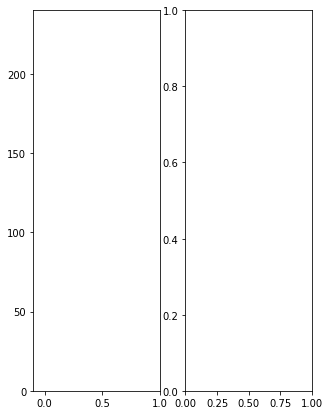

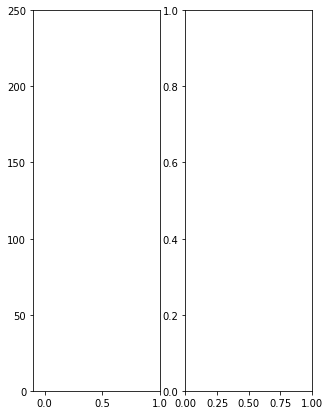

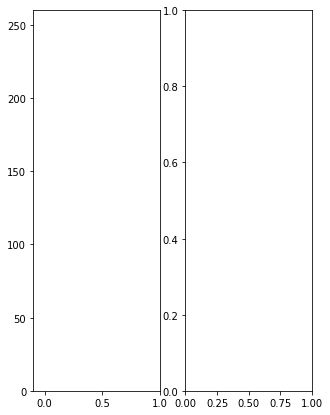

In [56]:
range_n_clusters = [3, 4, 5]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(5, 7)

     # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(features) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)





In [57]:

kmeans = KMeans(n_clusters=5).fit(df3)
centroids = kmeans.cluster_centers_
print(centroids)

ValueError: could not convert string to float: 'NP_057427'

In [ ]:
plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [32]:
#Load the third dataset (clinical dataset)
df2 = pd.read_csv("C:/Users/kenny/Downloads/Documents/REU-DataScienceProgram/REU-Project/REU-FinalProject/ClinicalDataBreastCancer.csv")

In [37]:
#select the two relevant columns in the clinical dataset that cotains the patients information and the corresponding breast cancer subtype to perform a visualization on the PAM

df4 = df2[['Complete TCGA ID','PAM50 mRNA']]
df4

,Complete TCGA ID,PAM50 mRNA
0,TCGA-A2-A0T2,Basal-like
1,TCGA-A2-A0CM,Basal-like
2,TCGA-BH-A18V,Basal-like
3,TCGA-BH-A18Q,Basal-like
4,TCGA-BH-A0E0,Basal-like
...,...,...
100,TCGA-BH-A0C7,Luminal B
101,TCGA-BH-A0DD,Luminal B
102,TCGA-C8-A12U,Luminal B
103,TCGA-C8-A12W,Luminal B


In [49]:
#dictionary for base price per cuisine
subtype_class = {}
for i in df4['PAM50 mRNA'].unique():
    subtype_class[i] = df[df['PAM50 mRNA']==i].tcga_id

TypeError: 'method' object is not subscriptable

In [50]:
#plotting boxplot 
plt.boxplot([x for x in c_price.values()],labels=[x for x in c_price.keys()]) 

#x and y-axis labels 
plt.xlabel('PAM50 mRNA') 
plt.ylabel('Complete TCGA ID') 

#plot title 
plt.title('Classification of Subtypes') 

#save and display 
plt.savefig('C:\\Users\\Dell\\Desktop\\AV Plotting images\\matplotlib_plotting_9.png',dpi=300,bbox_inches='tight') 
plt.show();

NameError: name 'c_price' is not defined

In [38]:
#Transpose
df4 = df4.transpose

In [ ]:
kmeans = KMeans(n_clusters=5).fit(df4)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()